In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Load dataset from the GitHub URL
url_data = 'https://raw.githubusercontent.com/Sayalinale/Shopease_Data_Analysis/refs/heads/main/sales_data.csv'
sales_data = pd.read_csv(url_data)

In [34]:
print(sales_data.head())

   Transaction_ID        Date Customer_ID     Product     Category  Quantity  \
0            1001  2024-01-05        C001      Laptop  Electronics         1   
1            1002  2024-01-10        C002  Smartphone  Electronics         2   
2            1003  2024-01-12        C003  Headphones  Electronics         1   
3            1004  2024-02-05        C004      Tablet  Electronics         1   
4            1005  2024-02-08        C005        Book        Books         3   

   Price  Total_Amount Payment_Method Region  
0    800           NaN    Credit Card  North  
1    600        1200.0           Cash  South  
2    100         100.0         PayPal   West  
3    500         500.0     Debit Card   East  
4     20          60.0    Credit Card  North  


In [35]:
print(sales_data.info)

<bound method DataFrame.info of     Transaction_ID        Date Customer_ID     Product     Category  Quantity  \
0             1001  2024-01-05        C001      Laptop  Electronics         1   
1             1002  2024-01-10        C002  Smartphone  Electronics         2   
2             1003  2024-01-12        C003  Headphones  Electronics         1   
3             1004  2024-02-05        C004      Tablet  Electronics         1   
4             1005  2024-02-08        C005        Book        Books         3   
5             1006  2024-02-10        C001      Laptop  Electronics         1   
6             1007  2024-03-15        C006       Shoes     Clothing         2   
7             1008  2024-03-18        C007     T-Shirt     Clothing         1   
8             1009  2024-03-20        C008  Smartwatch  Electronics         1   
9             1010  2024-04-01        C009        Book        Books         2   
10            1011  2024-04-05        C002  Smartphone  Electronics         2

In [36]:
# Remove duplicates
sales_data = sales_data.drop_duplicates()

In [37]:
# Check for missing values in each column
missing_values = sales_data.isnull().sum()

# Print only columns with missing values
print(missing_values[missing_values > 0])


Total_Amount    1
dtype: int64


In [38]:
# Print column names and number of missing values
for column, count in missing_values.items():
    print(f"Column '{column}' has {count} missing value(s)")

Column 'Transaction_ID' has 0 missing value(s)
Column 'Date' has 0 missing value(s)
Column 'Customer_ID' has 0 missing value(s)
Column 'Product' has 0 missing value(s)
Column 'Category' has 0 missing value(s)
Column 'Quantity' has 0 missing value(s)
Column 'Price' has 0 missing value(s)
Column 'Total_Amount' has 1 missing value(s)
Column 'Payment_Method' has 0 missing value(s)
Column 'Region' has 0 missing value(s)


In [39]:
sales_data['Total_Amount'] = sales_data['Total_Amount'].fillna(sales_data['Quantity'] * sales_data['Price'])

In [40]:
# Convert 'Date' column to datetime format (YYYY-MM-DD)
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce').dt.date

In [41]:
# Convert columns to numeric (just in case there are any stray symbols)
sales_data['Quantity'] = pd.to_numeric(sales_data['Quantity'], errors='coerce')
sales_data['Price'] = pd.to_numeric(sales_data['Price'], errors='coerce')
sales_data['Total_Amount'] = pd.to_numeric(sales_data['Total_Amount'], errors='coerce')


In [42]:
sales_data.to_csv(r'D:\Sayali\Job Applications\UpTrail Internship\shopease_cleaned.csv', index=False)

In [43]:
print(sales_data.describe())

       Transaction_ID   Quantity       Price  Total_Amount
count        20.00000  20.000000   20.000000     20.000000
mean       1010.50000   1.550000  325.500000    396.500000
std           5.91608   0.887041  302.484884    390.418466
min        1001.00000   1.000000   20.000000     25.000000
25%        1005.75000   1.000000   43.750000     78.750000
50%        1010.50000   1.000000  200.000000    200.000000
75%        1015.25000   2.000000  600.000000    650.000000
max        1020.00000   4.000000  800.000000   1200.000000


In [44]:
# Extract Month and Year
sales_data['Month'] = pd.to_datetime(sales_data['Date']).dt.month_name()
sales_data['Year'] = pd.to_datetime(sales_data['Date']).dt.year


In [45]:
monthly_sales = sales_data.groupby(['Year', 'Month'])['Total_Amount'].sum().reset_index()

# Optional: Sort months correctly
from pandas.api.types import CategoricalDtype

months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
month_cat = CategoricalDtype(categories=months_order, ordered=True)
monthly_sales['Month'] = monthly_sales['Month'].astype(month_cat)

# Sort values
monthly_sales = monthly_sales.sort_values(['Year', 'Month'])
print(monthly_sales)


   Year     Month  Total_Amount
2  2024   January        2100.0
1  2024  February        1360.0
4  2024     March         325.0
0  2024     April        1740.0
5  2024       May        1025.0
3  2024      June        1380.0


In [46]:
category_sales = sales_data.groupby('Category')['Total_Amount'].sum().sort_values(ascending=False)
print(category_sales)

Category
Electronics    7500.0
Clothing        250.0
Books           180.0
Name: Total_Amount, dtype: float64


In [47]:
category_sales = sales_data.groupby('Category')['Total_Amount'].sum().sort_values(ascending=False)
print(category_sales)

Category
Electronics    7500.0
Clothing        250.0
Books           180.0
Name: Total_Amount, dtype: float64


In [48]:
avg_customer_spend = sales_data.groupby('Customer_ID')['Total_Amount'].sum().mean()
print(f"Average spend per customer: ${avg_customer_spend:.2f}")

Average spend per customer: $440.56


In [49]:
correlation = sales_data[['Quantity', 'Price', 'Total_Amount']].corr()
print(correlation)

              Quantity     Price  Total_Amount
Quantity      1.000000 -0.423792     -0.199315
Price        -0.423792  1.000000      0.892401
Total_Amount -0.199315  0.892401      1.000000


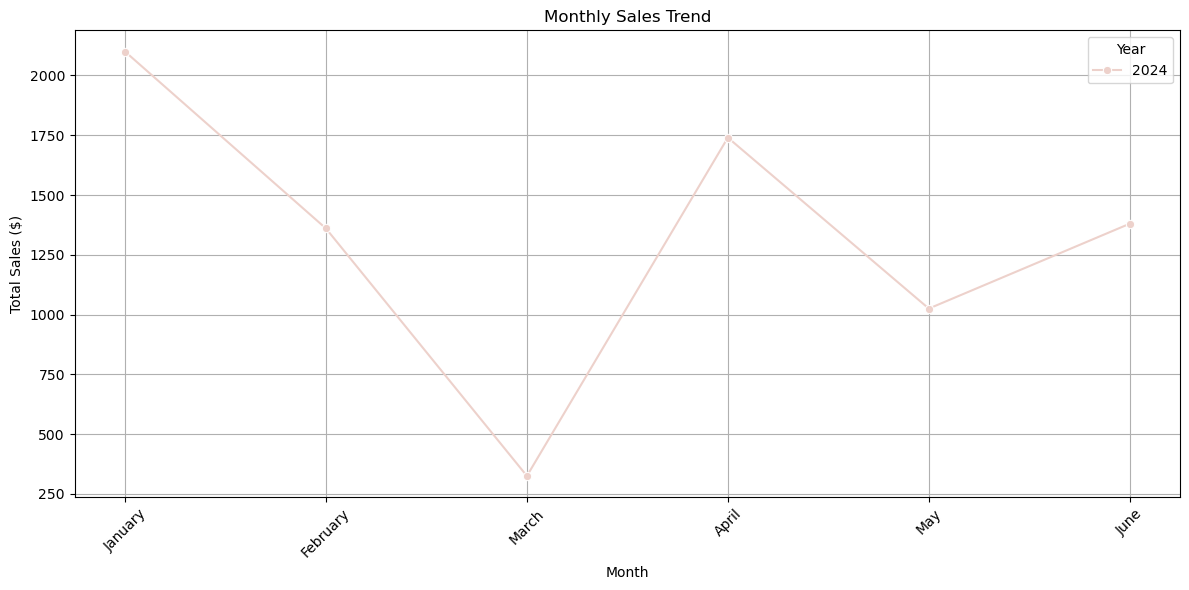

In [50]:
# Prepare monthly sales data again if needed
monthly_sales = sales_data.groupby(['Year', 'Month'])['Total_Amount'].sum().reset_index()

# Ensure correct month order
from pandas.api.types import CategoricalDtype

months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
month_cat = CategoricalDtype(categories=months_order, ordered=True)
monthly_sales['Month'] = monthly_sales['Month'].astype(month_cat)

# Sort and plot
monthly_sales = monthly_sales.sort_values(['Year', 'Month'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Amount', hue='Year', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


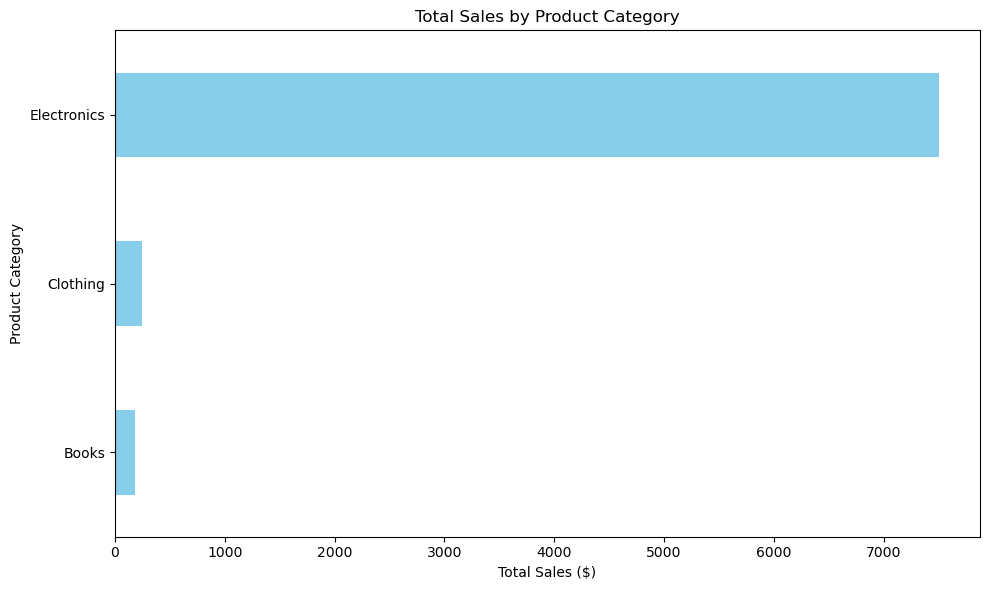

In [51]:
category_sales = sales_data.groupby('Category')['Total_Amount'].sum().sort_values()

plt.figure(figsize=(10, 6))
category_sales.plot(kind='barh', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


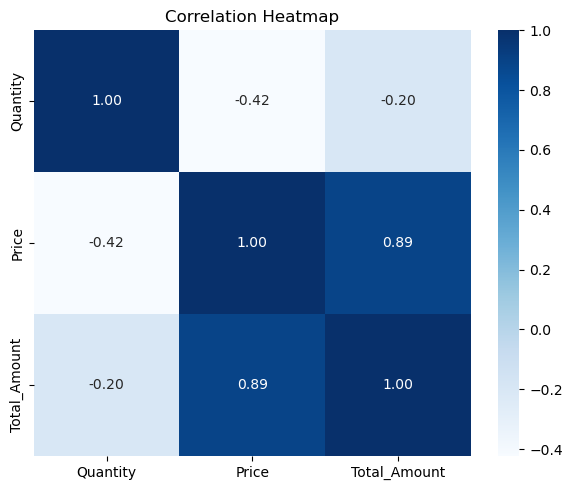

In [52]:
plt.figure(figsize=(6, 5))
corr = sales_data[['Quantity', 'Price', 'Total_Amount']].corr()

sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


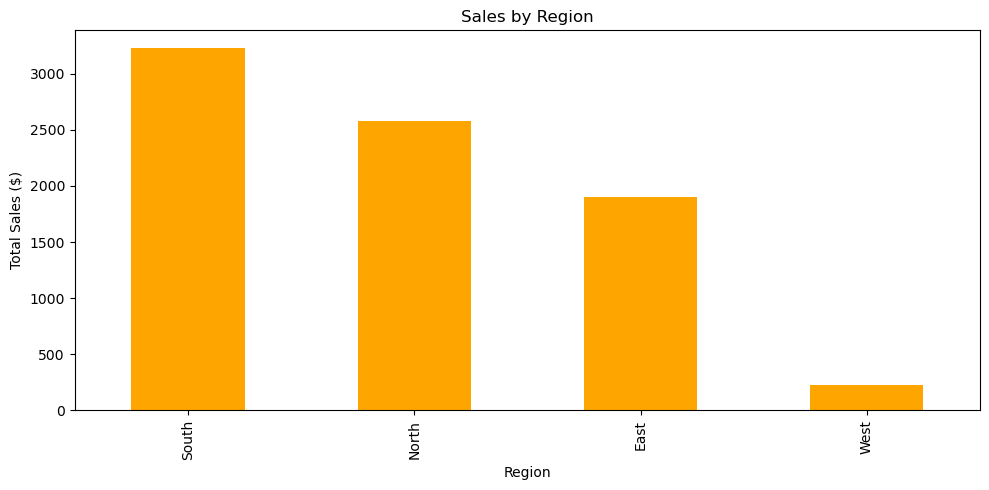

In [53]:
# Group by region
region_sales = sales_data.groupby('Region')['Total_Amount'].sum().sort_values(ascending=False)

# Simple bar chart version
region_sales.plot(kind='bar', color='orange', figsize=(10, 5), title='Sales by Region')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()


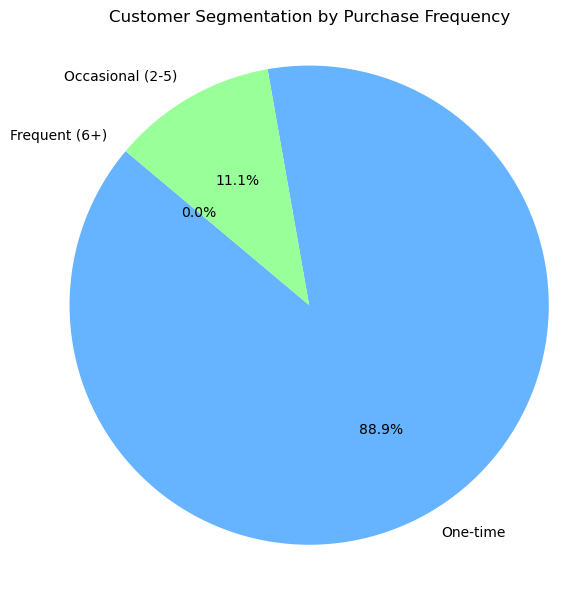

In [54]:
# Count purchases per customer
purchase_counts = sales_data['Customer_ID'].value_counts()

# Define segments
segments = {
    'One-time': (purchase_counts == 1).sum(),
    'Occasional (2-5)': ((purchase_counts >= 2) & (purchase_counts <= 5)).sum(),
    'Frequent (6+)': (purchase_counts > 5).sum()
}

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(segments.values(), labels=segments.keys(), autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Customer Segmentation by Purchase Frequency')
plt.axis('equal')
plt.tight_layout()
plt.show()
